# Exact Smooth Term-Structure Estimation

Filipovic and Willems presented a non-parametric method to estimate the discount curve from market quotes based on the Moore–Penrose pseudoinverse. The discount curve reproduces the market quotes perfectly, has maximal smoothness, and is given in closed-form. The method is easy to implement and requires only basic linear algebra operations.

For theoretical details please refer to https://arxiv.org/pdf/1606.03899.pdf <br>
Filipovic, D. and S. Willems (2018). Exact Smooth Term-Structure Estimation. *SIAM Journal on Financial Mathematics*

First, we define the linear functional which evaluates the discount curve, and its derivative.

In [1]:
import numpy as np

def fi(tau, x): return 1. - ((min(x,tau))**3)/6. + x*tau*(2+min(x,tau))/2.
def fi_d1(tau, x): return tau - ((min(x,tau))**2)/2. + tau*min(x,tau)

For the sake of simplicity, we calculate the matrices and vectors needed in Excel, then import them by *pandas.read_excel( )*.

In [2]:
import pandas
p = pandas.read_excel('yieldcurve_data.xlsx', sheet_name='p')
p = p.values

tenor = pandas.read_excel('yieldcurve_data.xlsx', sheet_name='x')
tenor = tenor.values

C = pandas.read_excel('yieldcurve_data.xlsx', sheet_name='C')
C = C.values

A = pandas.read_excel('yieldcurve_data.xlsx', sheet_name='A')
A = A.values

In [3]:
denom = np.matmul(C, A)
denom = np.matmul(denom, C.T)
denom = np.linalg.inv(denom)
z = np.matmul(C.T, denom)
z = np.dot(z, p)

After the algebraric operations as described in the paper, we then obtain analytical formulas for:
* *Discount factor*
* *forward curve*
* *yield curve*

In [31]:
import math

#discount factor
def g(t):
    ret = 0
    for i in range(len(z)):
        ret += (z[i]*fi(tenor[i],t))[0]
    return ret

#forward curve
def f(t):
    num_f = 0
    den_f = 0
    for i in range(len(z)):
        num_f += (z[i]*fi_d1(tenor[i],t))[0]
        den_f += (z[i]*fi(tenor[i],t))[0]
    return -num_f/den_f

#yield curve
def r(t):
    if t == 0:
        return f(0)
    else:
        return -math.log(g(t))/t

In [35]:
x = np.linspace(0, 12, num=100, endpoint=True)
discount_fct = [g(x_) for x_ in x]
forward_curve = [f(x_) for x_ in x]
yield_curve = [r(x_) for x_ in x]


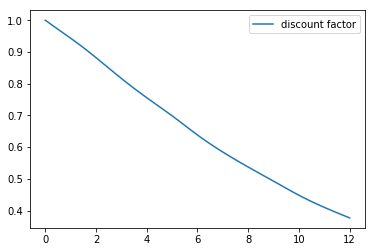

In [36]:
import matplotlib.pyplot as plt
plt.plot(x, discount_fct, '-')
plt.legend(['discount factor'])

(0, 0.09791399788371302)

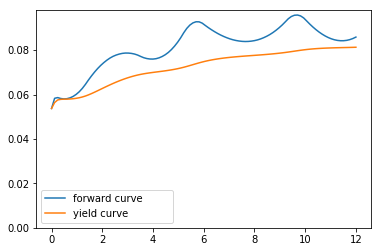

In [43]:
plt.plot(x, forward_curve, '-', x, yield_curve, '-')
plt.legend(['forward curve', 'yield curve             '])
plt.ylim(ymin=0)